In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 15_9-19.csv to 15_9-19.csv


In [3]:
file_path = '15_9-19.csv'
well = pd.read_csv(file_path)

In [4]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102 entries, 0 to 4101
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DEPTH     4102 non-null   object
 1   CALI      4102 non-null   object
 2   COAL      4102 non-null   object
 3   DT        4102 non-null   object
 4   DT_LOG    4102 non-null   object
 5   DTS       4102 non-null   object
 6   DTS_LOG   4102 non-null   object
 7   GR        4069 non-null   object
 8   NPHI      4101 non-null   object
 9   PHIE      4102 non-null   object
 10  PHIEC     4102 non-null   object
 11  PHIT      4102 non-null   object
 12  PHITC     4102 non-null   object
 13  RHOB      4102 non-null   object
 14  RHOB_LOG  4102 non-null   object
 15  RT        4102 non-null   object
 16  RW        4102 non-null   object
 17  TEMP      4102 non-null   object
dtypes: object(18)
memory usage: 577.0+ KB


# Fluid Type Identification

In [5]:
well = pd.read_csv("15_9-19.csv", header=0, skiprows=[1])


In [6]:
well.replace(-999.00, np.nan, inplace=True)

<ipython-input-7-b1363c149e62>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)


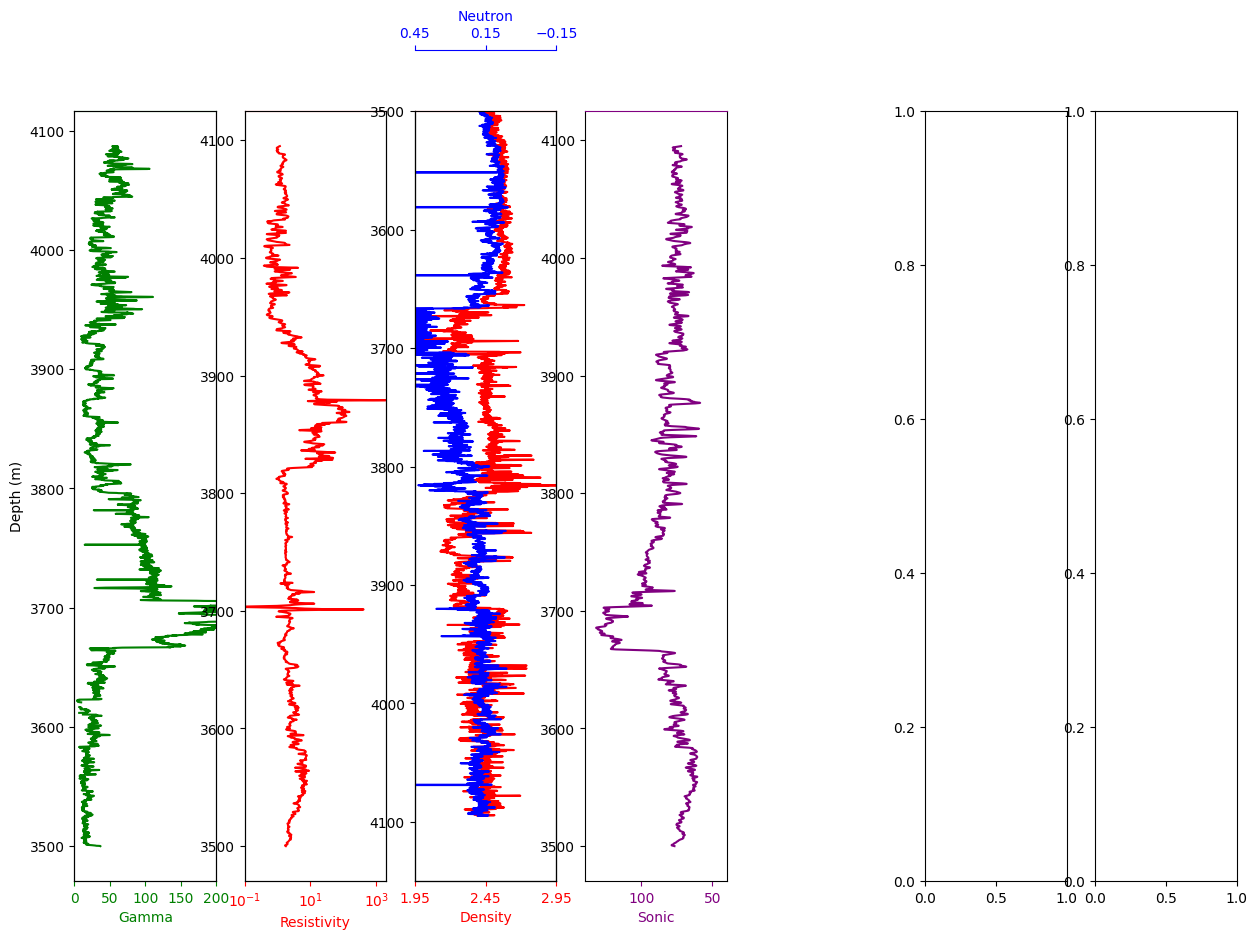

In [7]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = ax3.twiny() #Twins the y-axis for the density track with the neutron trackS
ax8 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

# As our curve scales will be detached from the top of the track,
# this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data = well, color = "green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistivity track
ax2.plot("RT", "DEPTH", data = well, color = "red")
ax2.set_xlabel("Resistivity")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Density track
ax3.plot("RHOB", "DEPTH", data = well, color = "red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonic track
ax4.plot("DT", "DEPTH", data = well, color = "purple")
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron track placed ontop of density track
ax5.plot("NPHI", "DEPTH", data = well, color = "blue")
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45,  0.15, -0.15])